In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [229]:
data = pd.read_csv("credit_card.csv")
# data = data.head(10000)
data.shape

(284807, 31)

In [230]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [231]:
data.groupby(['Class']).count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [232]:
data = data.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [233]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)
y_train = X_train['Class']
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227845, 29)

In [234]:
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

In [262]:
input_dim = X_train.shape[1]
encoding_dim = 100

model = Sequential()
model.add(Dense(encoding_dim, activation="tanh", input_shape=(input_dim,)))
model.add(Dense(int(encoding_dim / 2), activation="relu"))
model.add(Dense(int(encoding_dim / 2), activation='tanh'))
model.add(Dense(input_dim, activation='relu'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 100)               3000      
_________________________________________________________________
dense_104 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_105 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_106 (Dense)            (None, 29)                1479      
Total params: 12,079
Trainable params: 12,079
Non-trainable params: 0
_________________________________________________________________


In [263]:
early_stop = EarlyStopping(
    monitor='val_acc',
    patience=10,
    mode='auto',
)
cache = "saved_models/best_conf.ckpt"
checkpoint = ModelCheckpoint(cache,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

In [264]:
nb_epoch = 30
batch_size = 32

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

history = model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpoint, early_stop])

autoencoder = model

Epoch 1/30
7121/7121 [==============================] - 16s 2ms/step - loss: 0.6235 - acc: 0.8910 - val_loss: 0.6198 - val_acc: 0.9363

Epoch 00001: val_acc improved from -inf to 0.93629, saving model to saved_models\best_conf.ckpt
Epoch 2/30
7121/7121 [==============================] - 16s 2ms/step - loss: 0.5993 - acc: 0.9282 - val_loss: 0.6171 - val_acc: 0.9306

Epoch 00002: val_acc did not improve from 0.93629
Epoch 3/30
7121/7121 [==============================] - 16s 2ms/step - loss: 0.5973 - acc: 0.9320 - val_loss: 0.6125 - val_acc: 0.9469

Epoch 00003: val_acc improved from 0.93629 to 0.94691, saving model to saved_models\best_conf.ckpt
Epoch 4/30
7121/7121 [==============================] - 16s 2ms/step - loss: 0.5959 - acc: 0.9350 - val_loss: 0.6133 - val_acc: 0.9496

Epoch 00004: val_acc improved from 0.94691 to 0.94958, saving model to saved_models\best_conf.ckpt
Epoch 5/30
7121/7121 [==============================] - 16s 2ms/step - loss: 0.5955 - acc: 0.9355 - val_loss: 0.

In [265]:
model.load_weights("saved_models/best_conf.ckpt")

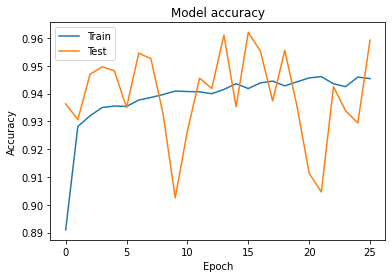

In [266]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [267]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

In [268]:
error_df.head()

,reconstruction_error,true_class
183484,0.281532,0
255448,0.210143,0
244749,0.931209,0
63919,0.402556,0
11475,0.617307,0


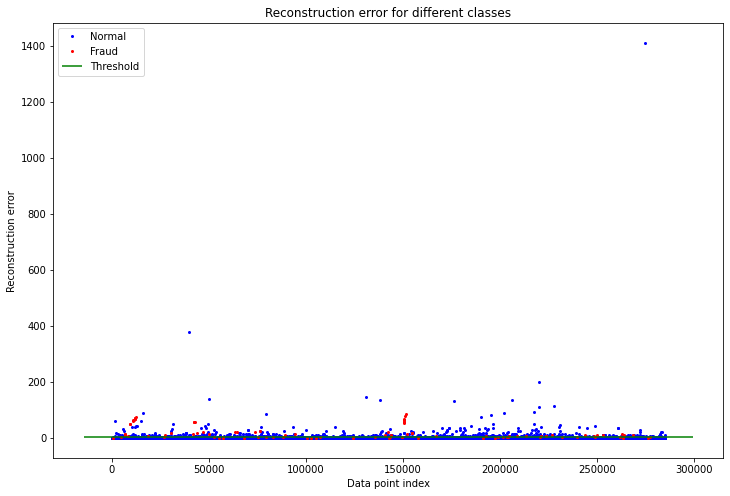

In [297]:
threshold = 2.0

groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12, 8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=2.0, linestyle='',
            label = "Fraud" if name == 1 else "Normal",
            color = "red" if name == 1 else "blue")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="green", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

In [298]:
normal = error_df[error_df.true_class == 0]
fraud = error_df[error_df.true_class == 1]

print('Normal transactions: %d, fraud transactions: %d' % (len(normal), len(fraud)))

Normal transactions: 56861, fraud transactions: 101


In [299]:
true_positives = len(fraud[fraud.reconstruction_error >= threshold])
false_positives = len(normal[normal.reconstruction_error >= threshold])

true_negatives = len(normal[normal.reconstruction_error < threshold])
false_negatives = len(fraud[fraud.reconstruction_error < threshold])

print('True positives: %d, true negatives: %d' % (true_positives, true_negatives))
print('False positives: %d, false negatives: %d' % (false_positives, false_negatives))

True positives: 86, true negatives: 55328
False positives: 1533, false negatives: 15


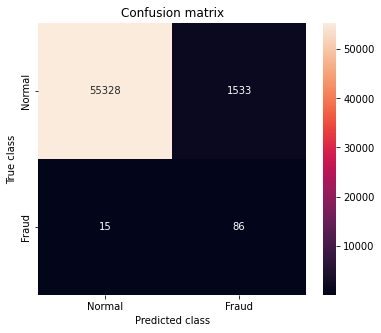

In [300]:
labels = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()